# Tom and jerry, loading dataset

## Imports

In [1]:
import kagglehub

from pathlib import Path

import keras

from matplotlib import pyplot as plt

import numpy as np

import tensorflow as tf

/Users/ramin/miniconda3/envs/tensorflow_312_new/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Get the data

In [2]:
path = Path(kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification"))

In [3]:
data_path = path / "tom_and_jerry/tom_and_jerry"

## Load data

In [4]:
train_data, test_data = keras.utils.image_dataset_from_directory(
    data_path,
    seed=10,
    validation_split=0.2,
    subset="both",
    batch_size=12,
    image_size=(80, 190),
    shuffle=True,
)

Found 5478 files belonging to 4 classes.
Using 4383 files for training.
Using 1095 files for validation.


In [5]:
train_data_size = np.ceil(train_data.cardinality().numpy() * 0.8)

new_train = train_data.take(train_data_size)
new_valid = train_data.skip(train_data_size)

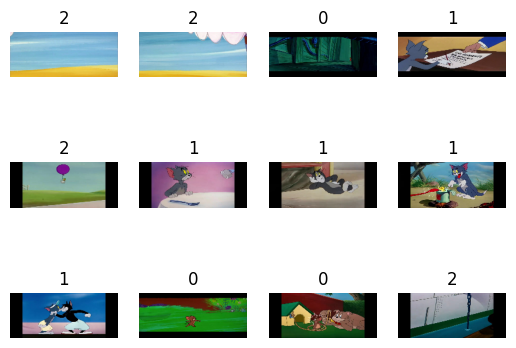

In [6]:
images, labels = next(iter(new_train.take(1)))

fig, axes = plt.subplots(3, 4)

axes_ravel = axes.ravel()

for i, (image, label) in enumerate(zip(images, labels)):
    axes_ravel[i].imshow(image.numpy().astype("uint8"))
    axes_ravel[i].set_axis_off()
    axes_ravel[i].set_title(f"{label}")


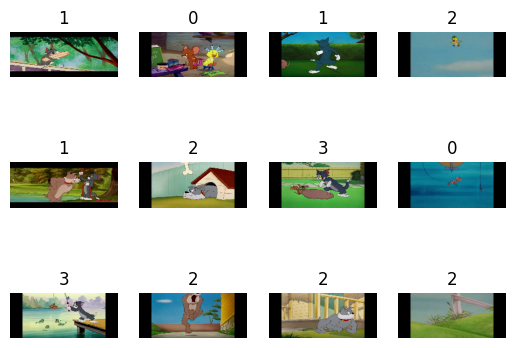

In [7]:
images, labels = next(iter(new_valid.take(1)))

fig, axes = plt.subplots(3, 4)

axes_ravel = axes.ravel()

for i, (image, label) in enumerate(zip(images, labels)):
    axes_ravel[i].imshow(image.numpy().astype("uint8"))
    axes_ravel[i].set_axis_off()
    axes_ravel[i].set_title(f"{label}")


In [8]:
print(new_train.cardinality().numpy(), new_valid.cardinality().numpy())

293 73


## Transfer learning

In [9]:
base_model = keras.applications.MobileNetV2(include_top=False)

base_model.trainable = False

/var/folders/wc/xkpkldpn6jl553z8rdtp0c_c0000gn/T/ipykernel_19005/3015679634.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(include_top=False)


In [28]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(80, 190, 3)),
        base_model,
        keras.layers.Flatten(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(4, activation="softmax"),
    ],
)


In [29]:
model.summary(show_trainable=True)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ mobilenetv2_1.00_224        │ (None, 2, 5, 1280)    │  2,257,984 │   N   │
│ (Functional)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_5 (Flatten)         │ (None, 12800)         │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_2 (Dropout)         │ (None, 12800)         │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_5 (Dense)             │ (None, 4)             │     51,204 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 2,309,188 (8.81 MB)

 Trainable params: 51,204 (200.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [30]:
opt = keras.optimizers.Adam()
# opt = keras.optimizers.SGD()

model.compile(
    optimizer=opt,
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [31]:
model.fit(new_train, epochs=20, validation_data=(new_valid))

Epoch 1/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.3856 - loss: 2.9927 - val_accuracy: 0.5144 - val_loss: 1.8269
Epoch 2/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.5981 - loss: 1.5687 - val_accuracy: 0.4129 - val_loss: 2.9214
Epoch 3/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.6277 - loss: 1.4793 - val_accuracy: 0.6309 - val_loss: 1.4358
Epoch 4/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.6751 - loss: 1.3519 - val_accuracy: 0.6286 - val_loss: 1.6416
Epoch 5/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.6962 - loss: 1.2377 - val_accuracy: 0.6298 - val_loss: 1.8753
Epoch 6/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.7191 - loss: 1.1569 - val_accuracy: 0.6159 - val_loss: 1.7905
Epoch 7/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.7546 - loss: 0.9964 - val_accuracy: 0.6275 - val_loss: 1.9483
Epoch 8/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.7476 - loss: 1.0960 - 

In [32]:
model.evaluate(test_data)

92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6572 - loss: 2.7057


[2.4624557495117188, 0.6794520616531372]